--- Libraries Imported Successfully ---
--- Data Loaded Successfully ---
Dataset Shape: (62516, 12)

First 5 Rows:
   ï»¿Complaint ID Submitted via Date submitted Date received State  \
0          4848023      Referral     2021-10-24    2021-10-27    NY   
1          3621464           Web     2020-04-24    2020-04-24    FL   
2          5818349           Web     2022-07-27    2022-07-27    CA   
3          7233015      Referral     2023-07-10    2023-07-11    CA   
4          5820224      Referral     2022-07-27    2022-07-28    VA   

                                             Product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3                        Credit card or prepaid card   
4                        Credit card or prepaid card   

                                  Sub-product  \
0                  Conventional home mortgage   
1                   Ref

C:\Users\ajink\AppData\Local\Temp\ipykernel_2872\3212033062.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette='magma')


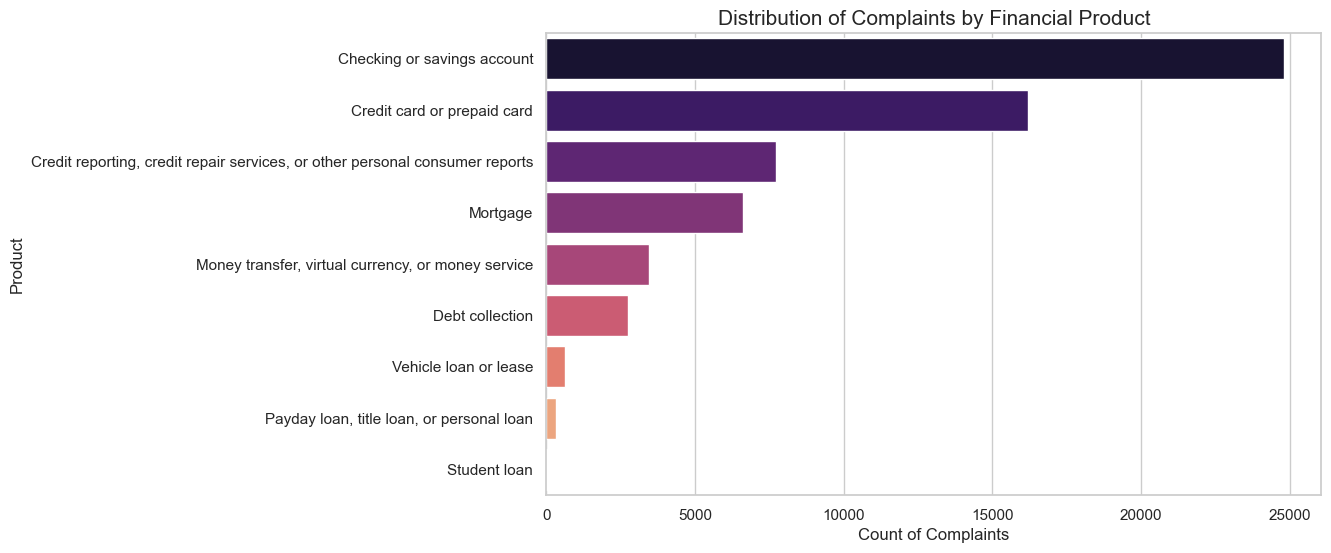

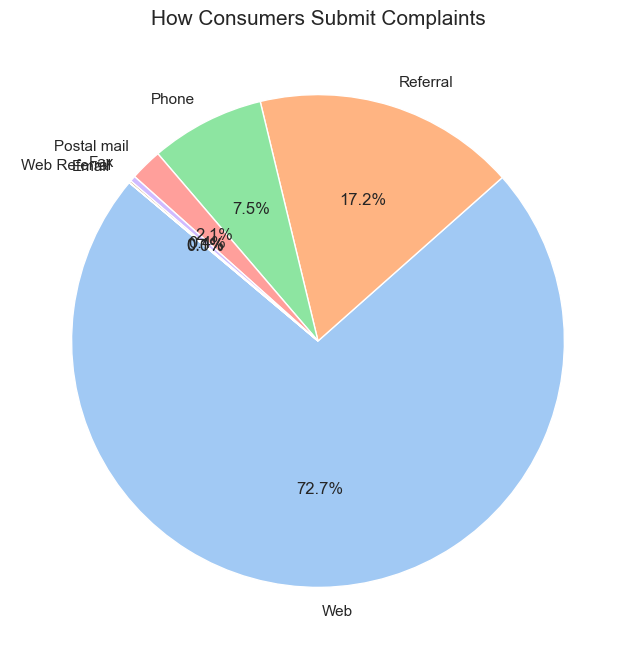


--- Preprocessing Data for NLP & ML ---
Training set size: 50012
Testing set size: 12504

--- Training Random Forest Model (This may take a moment) ---

Model Accuracy: 95.79%

Classification Report:
                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.96      0.99      0.97      4905
                                                 Credit card or prepaid card       0.99      0.89      0.94      3276
Credit reporting, credit repair services, or other personal consumer reports       0.85      0.99      0.92      1525
                                                             Debt collection       1.00      1.00      1.00       555
                          Money transfer, virtual currency, or money service       0.98      0.97      0.97       691
                                                                    Mortgage       1.00   

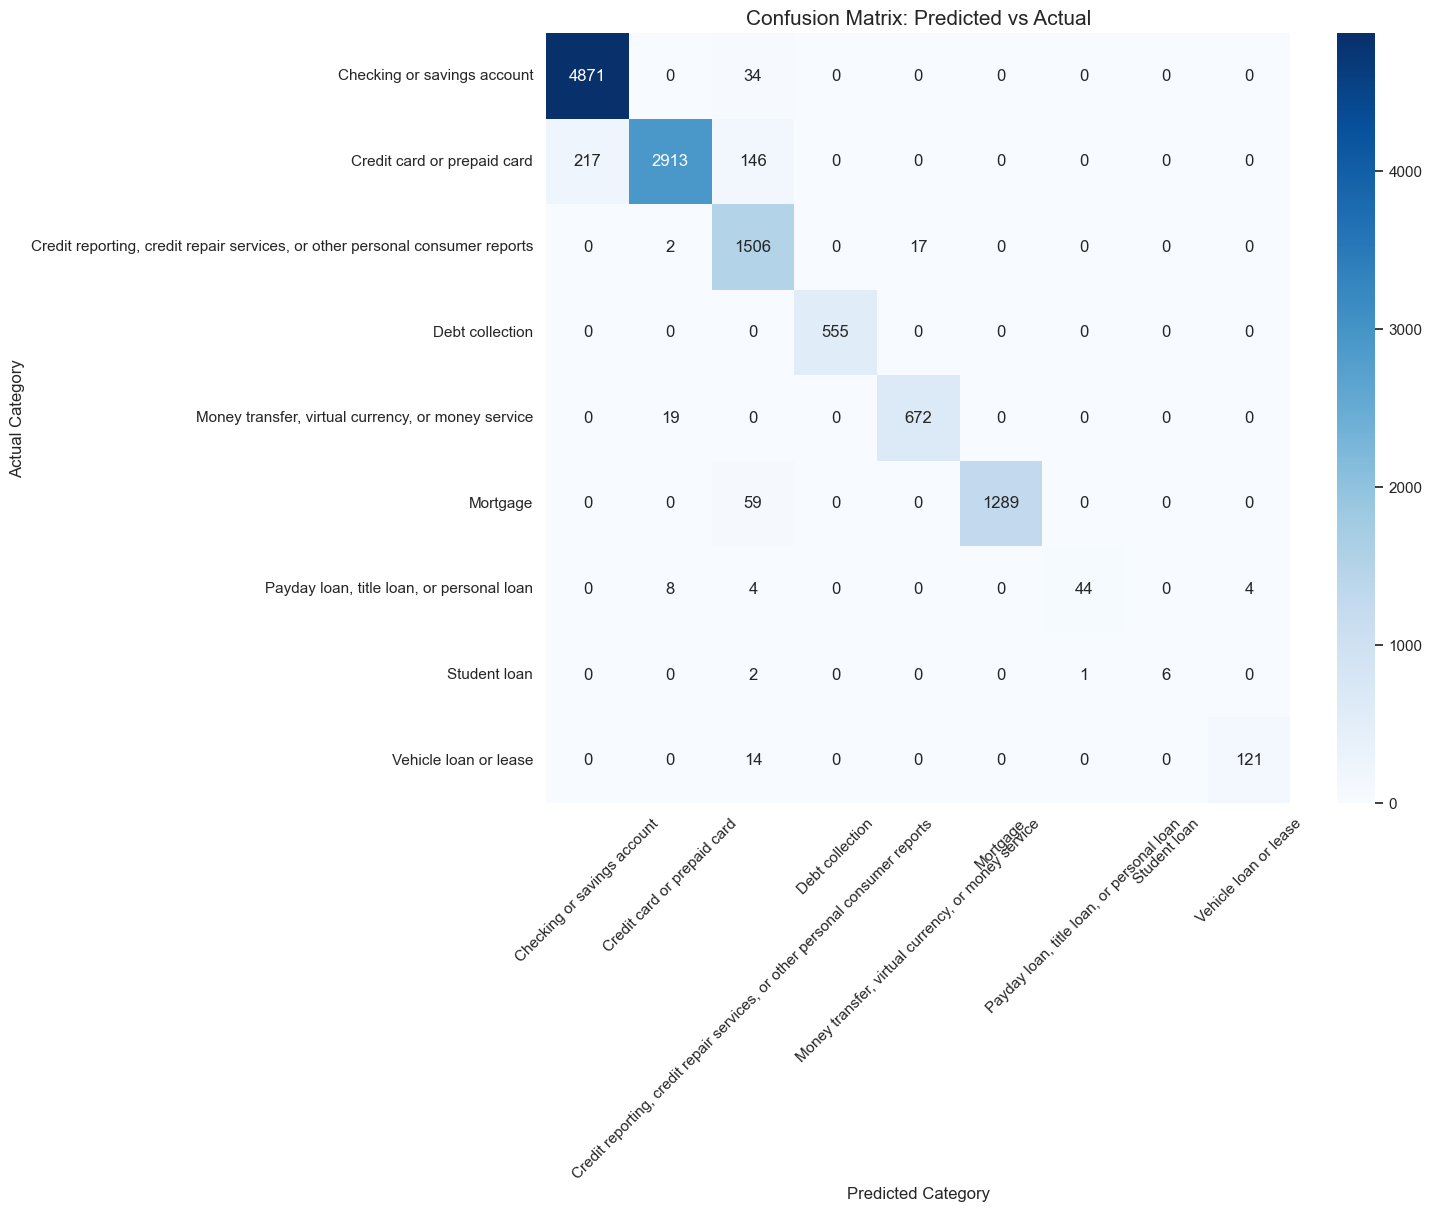


--- Testing the Model with a Custom Complaint ---
Complaint: 'I have a problem with my home loan payments and interest rates.'
Predicted Product Category: Credit card or prepaid card

--- Project Completed Successfully ---


In [ ]:
#"End-to-End Automated Categorization System for Financial Complaints"



# ==========================================
# 1. IMPORTING ALL NECESSARY LIBRARIES
# ==========================================
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & NLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Settings for visuals
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("--- Libraries Imported Successfully ---")

# ==========================================
# 2. DATA LOADING & INSPECTION
# ==========================================
# Load the dataset
# Note: Ensure the file is in the same folder as this notebook
try:
    df = pd.read_csv(r"C:\Users\ajink\Downloads\Customer_Complaints\complaints.csv", encoding="latin-1")
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print("Error: 'complaints.csv' not found. Please ensure the file is in the same folder.")

# Display basic info
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 Rows:")
print(df.head())

# ==========================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
print("\n--- Generating Visualizations ---")

# Visual 1: Distribution of Financial Products
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette='magma')
plt.title('Distribution of Complaints by Financial Product', fontsize=15)
plt.xlabel('Count of Complaints')
plt.show()

# Visual 2: Submission Methods
plt.figure(figsize=(8, 8))
df['Submitted via'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('How Consumers Submit Complaints', fontsize=15)
plt.ylabel('')
plt.show()

# ==========================================
# 4. DATA PREPROCESSING FOR MACHINE LEARNING
# ==========================================
print("\n--- Preprocessing Data for NLP & ML ---")

# We want to predict the 'Product' category based on the 'Issue' text
# 1. Keep only necessary columns and remove rows with missing values
ml_data = df[['Issue', 'Product']].dropna()

# 2. Text Cleaning: Convert to lowercase
ml_data['Issue'] = ml_data['Issue'].str.lower()

# 3. Label Encoding: Convert Product names into numbers for the model
le = LabelEncoder()
ml_data['Product_ID'] = le.fit_transform(ml_data['Product'])

# 4. TF-IDF Vectorization: Convert text into numerical format
# We limit to 2000 words to keep it beginner-friendly and fast
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf.fit_transform(ml_data['Issue'])
y = ml_data['Product_ID']

# 5. Train/Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# ==========================================
# 5. MODEL BUILDING & EVALUATION
# ==========================================
print("\n--- Training Random Forest Model (This may take a moment) ---")

# We use Random Forest because it is robust and popular in interviews
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Results
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual', fontsize=15)
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.xticks(rotation=45)
plt.show()

# ==========================================
# 6. MOCK PREDICTION (The 'GenAI' Concept)
# ==========================================
print("\n--- Testing the Model with a Custom Complaint ---")

def predict_complaint(text):
    text_processed = tfidf.transform([text.lower()])
    prediction = rf_model.predict(text_processed)
    category = le.inverse_transform(prediction)
    return category[0]

# Example text
sample_complaint = "I have a problem with my home loan payments and interest rates."
predicted_cat = predict_complaint(sample_complaint)
print(f"Complaint: '{sample_complaint}'")
print(f"Predicted Product Category: {predicted_cat}")

print("\n--- Project Completed Successfully ---")